# Doubly constrained gravity model

For a given:
* set of origins $i$ and destinations $j$ 
* production at origins vector $O_i$
* attraction at destinations vector $D_j$
* distance (cost) matrix between origins and destinations $C_{ij}$
* cost function for the decay/gravity function $T_{ij}=exp(-\beta C_{ij})$

Compute:
* trip matrix $T_{ij}$ such that
* $\sum_{i \in O} T_{ij} = O_i \forall j \in O$
* $\sum_{j \in D} T_{ij} = D_i \forall i \in D $


In [87]:
%load_ext autoreload
%autoreload 2

In [73]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotmap import DotMap
import os
import math

In [115]:
from triply import *

In [119]:
X = pipe()

/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:46-CRITICAL-Outer ite: 0	 error:4244515.58	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:48-CRITICAL-Outer ite: 1	 error:75013.07	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:49-CRITICAL-Outer ite: 2	 error:2295.01	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:51-CRITICAL-Outer ite: 3	 error:142.19	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:52-CRITICAL-Outer ite: 4	 error:9.59	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:54-CRITICAL-Outer ite: 5	 error:0.67	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:55-CRITICAL-Outer ite: 6	 error:0.05	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:57-CRITICAL-Converged Ite: 7	 error:0.01	


1 59477 59477.0
2 87185 87185.0
3 85565 85565.0


0.005098773422997307

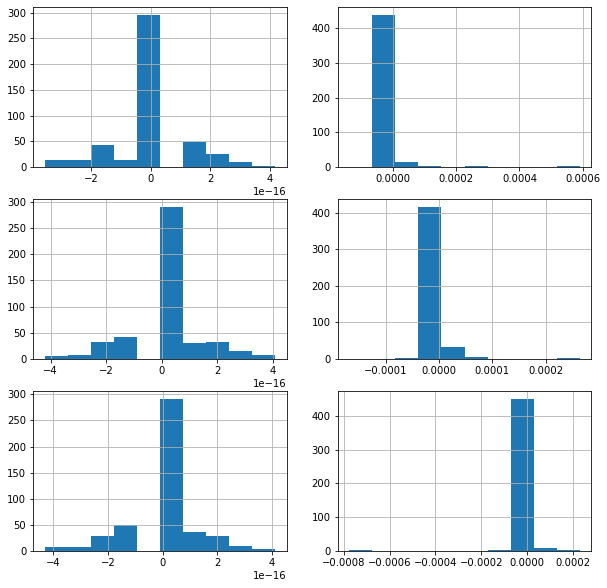

In [142]:
inData = read_wichita()
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()
j=-1
for k in [1,2,3]:
    j+=1
    Xij_k = inData['full_xij_k{}'.format(k)]
    S = Xij_k.sum(axis=1)
    D = Xij_k.sum(axis=0)
    ((X[k].sum(1) - S) / S).hist(ax=ax[j]) 
    print(k, S.sum(),X[k].sum().sum())
    j+=1
    ((X[k].sum(0) - D) / S).hist(ax=ax[j]) 
((sum([X[k] for k in [1,2,3]])-inData.full_xij)**2).sum().sum()

<AxesSubplot:ylabel='Frequency'>

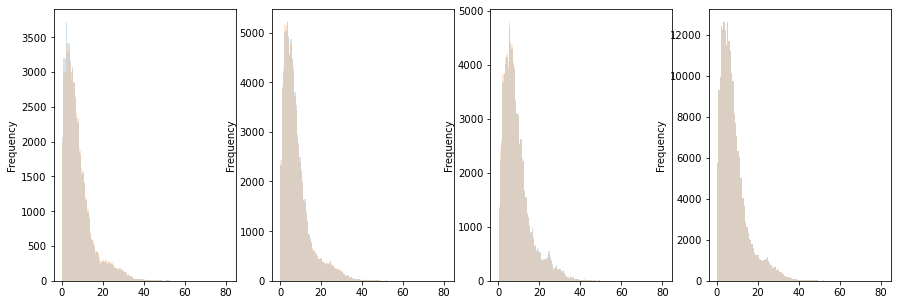

In [140]:
inData = read_wichita()
fig, ax = plt.subplots(1,4, figsize=(15,5))
ax = ax.flatten()
j=-1


for k in [1,2,3]:
    j+=1
    Xij_k = inData['full_xij_k{}'.format(k)]
    S = Xij_k.sum(axis=1)
    D = Xij_k.sum(axis=0)
    H = Xij_k.stack().to_frame()
    H.columns = ['flow']
    H['cost'] = inData.dist.stack()
    #H = H[H['cost']>10]
    H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[k-1], bins = 130, alpha = 0.2) # trip distance distribution
    H = X[k].stack().to_frame()
    H.columns = ['flow']
    H['cost'] = inData.dist.stack()
    #H = H[H['cost']>10]
    H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[k-1], bins = 130, alpha = 0.2) # trip distance distribution
Xij_k = inData['full_xij']
S = Xij_k.sum(axis=1)
D = Xij_k.sum(axis=0)
H = Xij_k.stack().to_frame()
H.columns = ['flow']
H['cost'] = inData.dist.stack()
#H = H[H['cost']>10]
H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[3], bins = 130, alpha = 0.2) # trip distance distribution
    
((sum([X[k] for k in [1,2,3]])-inData.full_xij)**2).sum().sum()
H = sum([X[k] for k in [1,2,3]]).stack().to_frame()
H.columns = ['flow']
H['cost'] = inData.dist.stack()
#H = H[H['cost']>10]
H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[3], bins = 130, alpha = 0.2) # trip distance distribution

----
(c) Rafal Kucharski, 2022